# Factors Influence Student's Test Performance

Student's score in maths, reading and writing were recorded. Their demographic include gender, race, parents education background, lunch type and test preparation course were stated in order to identify its relationship with the score.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv("C:/Users/USER/Downloads/Data Science Projects/exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


# 2. Exploratory Data Analysis (EDA)

## 2.1 Summary Statistics

In [2]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [3]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print(df["gender"].unique())
print(df["race/ethnicity"].unique())
print(df["parental level of education"].unique())
print(df["lunch"].unique())
print(df["test preparation course"].unique())

['female' 'male']
['group D' 'group B' 'group C' 'group E' 'group A']
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
['standard' 'free/reduced']
['completed' 'none']


## 2.2 Data Visualization

### 2.2.1 Gender

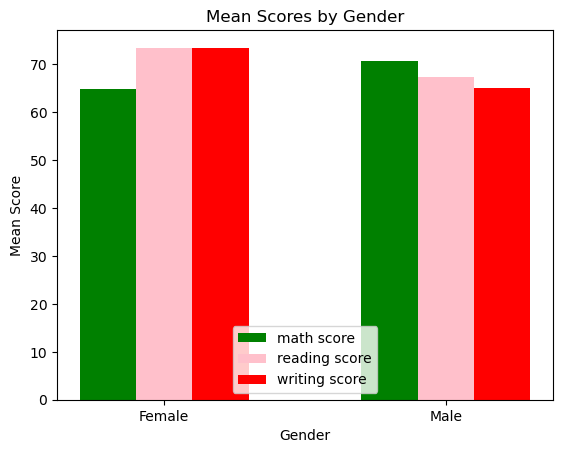

In [6]:
# Sample data
genders = ['Female', 'Male']  

# Group the DataFrame by 'gender' and calculate the mean scores
means = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Get the number of categories and scores
num_categories = len(genders)
num_scores = len(means.columns)

# Set the positions and width for the bars
x = np.arange(num_categories)
bar_width = 0.2
colors=["green","pink","red"]
# Create the grouped bar chart
for i, score in enumerate(means.columns):
    plt.bar(x + i * bar_width, means[score], width=bar_width, label=score, align='center',color=colors[i])

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Gender')
plt.xticks(x + (bar_width * (num_scores - 1) / 2), genders)
plt.legend()

# Show the plot
plt.show()


In this loop: <br><br>

-i is the loop index, as explained in the previous response.<br>
-score is a loop variable that represents the name of each score category (e.g., 'math score,' 'reading score,' or 'writing score') as we iterate through the columns in means.columns.<br><br>

As the loop iterates, score takes on the values of each column name, and this allows us to create a separate bar for each score category on the bar chart. The label=score part is used to label each set of bars with the corresponding score category name in the legend of the plot. This way, we can distinguish between the different categories on the chart.<br>

Female averagely got the higher score than male in reading and writing score, above than 70%. While, for math score, male got higher score averagely.



### 2.2.2 Race

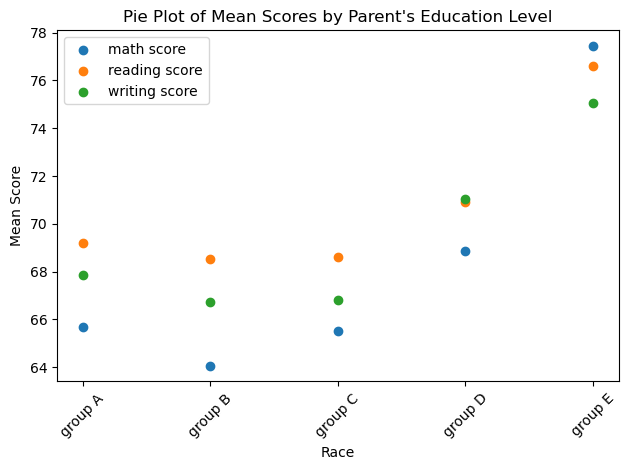

In [7]:
import matplotlib.pyplot as plt

# Sample data
ethnic = ['group A', 'group B', 'group C', 'group D', 'group E']

# Group the DataFrame by 'parental level of education' and calculate the mean scores
means = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# Get the number of categories and scores
et_categories = len(ethnic)
num_scores2 = len(means.columns)

# Create a scatter plot
for i, score in enumerate(means.columns):
    x = range(et_categories)
    y = means[score]
    plt.scatter(x,y,label=score)

# Customize the plot
plt.xlabel("Race")
plt.ylabel("Mean Score")
plt.title("Pie Plot of Mean Scores by Parent's Education Level")
plt.xticks(range(et_categories), ethnic, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Ethnic from group E averagely scored the highest mark among ethnics.

### 2.2.3 Parents Education

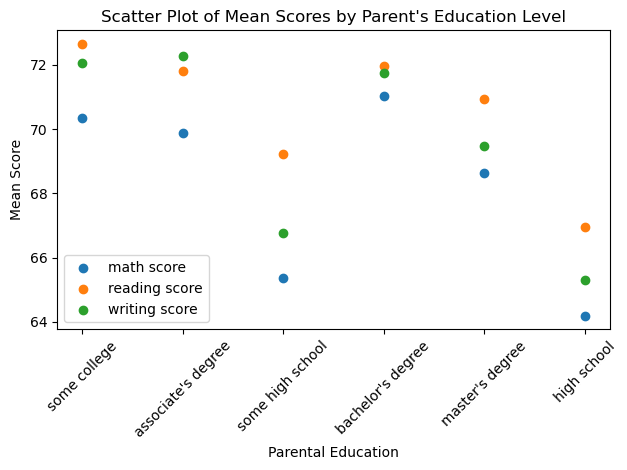

In [8]:
import matplotlib.pyplot as plt

# Sample data
edu = ['some college', "associate's degree", 'some high school',
    "bachelor's degree", "master's degree", 'high school']

# Group the DataFrame by 'parental level of education' and calculate the mean scores
means = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

# Get the number of categories and scores
edu_categories = len(edu)
num_scores2 = len(means.columns)

# Create a scatter plot
for i, score in enumerate(means.columns):
    x = range(edu_categories)
    y = means[score]
    plt.scatter(x, y, label=score)

# Customize the plot
plt.xlabel("Parental Education")
plt.ylabel("Mean Score")
plt.title("Scatter Plot of Mean Scores by Parent's Education Level")
plt.xticks(range(edu_categories), edu, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Student's performance in test are influenced by parental education, in which student who have parents with high education levels tend to score higher than those with parents with low education level include high school and some high school.

### 2.2.4 Lunch and Test Preparation Course

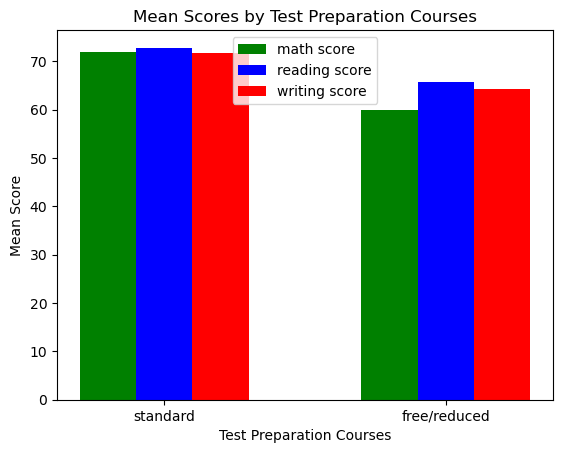

In [29]:
import matplotlib.pyplot as plt

# Sample data
lnch = ['standard','free/reduced']

# Group the DataFrame by 'parental level of education' and calculate the mean scores
means = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

# Get the number of categories and scores
lunch_type = len(lnch)
num_scores5 = len(means.columns)

# Set the positions and width for the bars
x = np.arange(lunch_type)
bar_width = 0.2
colors=["green","blue","red"]

# Create the grouped bar chart
for i, score in enumerate(means.columns):
    plt.bar(x + i * bar_width, means[score], width=bar_width, label=score, align='center',color=colors[i])

# Customize the plot
plt.xlabel('Test Preparation Courses')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Test Preparation Courses')
plt.xticks(x + (bar_width * (num_scores5 - 1) / 2), lnch)
plt.legend()

# Show the plot
plt.show()

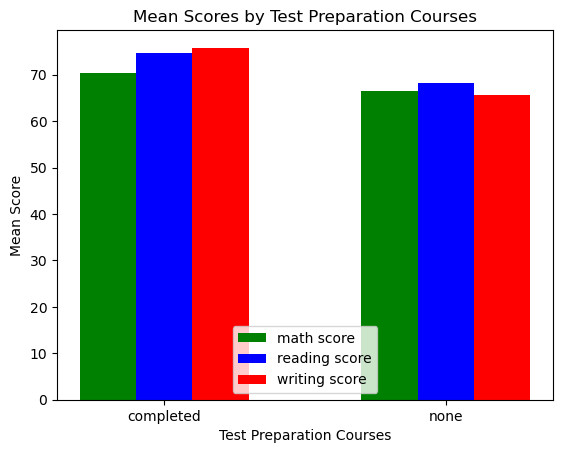

In [10]:
import matplotlib.pyplot as plt

# Sample data
compnone = ['completed','none']

# Group the DataFrame by 'parental level of education' and calculate the mean scores
means = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Get the number of categories and scores
comp_type = len(compnone)
num_scores4 = len(means.columns)

# Set the positions and width for the bars
x = np.arange(comp_type)
bar_width = 0.2
colors=["green","blue","red"]

# Create the grouped bar chart
for i, score in enumerate(means.columns):
    plt.bar(x + i * bar_width, means[score], width=bar_width, label=score, align='center',color=colors[i])

# Customize the plot
plt.xlabel('Test Preparation Courses')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Test Preparation Courses')
plt.xticks(x + (bar_width * (num_scores4 - 1) / 2), compnone)
plt.legend()

# Show the plot
plt.show()

Students who have standard meals seems to get much higher score than those who have free/reduced meals during their lunch. <br><br>
And for test preparation course, students who complete it got the higher score than those who don't.

## 2.3 Hypothesis Testing

In [11]:
import scipy.stats as stats

# Group the DataFrame by 'parental level of education' and calculate the mean scores
means = df.groupby('parental level of education')['math score'].mean()

# Get the number of scores
#num_scores2 = len(means.columns)

# Define the null hypothesis
H0 = "The average score for student with associate degree as parental background  is less than 80%."

# Define the alternative hypothesis
H1 = "The average score for student with associate degree as parental background  is more than 80%."

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(means, 999)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: -810.8456750441966
p-value: 5.4150910279738245e-14
Reject the null hypothesis.


# Data Processing

1) Change the columns name <br>
2) Replace string into int/float

In [12]:
df.rename(columns={"race/ethnicity":"race"}, inplace=True)
df.rename(columns={"parental level of education":"parents_edu"}, inplace=True)
df.rename(columns={"test preparation course":"test_prep"}, inplace=True)

In [13]:
df.gender[df.gender == 'male'] = 1
df.gender[df.gender == 'female'] = 2

C:\Users\USER\AppData\Local\Temp\ipykernel_9528\1624912702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'male'] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_9528\1624912702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'female'] = 2


In [14]:
df.head()

,gender,race,parents_edu,lunch,test_prep,math score,reading score,writing score
0,2,group D,some college,standard,completed,59,70,78
1,1,group D,associate's degree,standard,none,96,93,87
2,2,group D,some college,free/reduced,none,57,76,77
3,1,group B,some college,free/reduced,none,70,70,63
4,2,group D,associate's degree,standard,none,83,85,86


**Change other values as well.**<br>
**RACE**<br>
group A-->1 <br>
group B-->2 <br>
group C-->3 <br>
group D-->4 <br>
group E-->5 <br><br>

**PARENTS EDUCATION** <br>
master's degree-->1 <br>
bachelor's degree-->2 <br>
associate's degree-->3 <br>
some college-->4 <br>
high school-->5 <br>
some high school-->6 <br><br>

**LUNCH**<br>
standard-->1 <br>
free/reduced-->2 <br><br>

**TEST PREPARATION COURSE**<br>
completed-->1 <br>
none-->2 <br><br>


In [15]:
df.race[df.race == 'group A'] = 1
df.race[df.race == 'group B'] = 2
df.race[df.race == 'group C'] = 3
df.race[df.race == 'group D'] = 4
df.race[df.race == 'group E'] = 5

df.parents_edu[df.parents_edu == "master's degree"] = 1
df.parents_edu[df.parents_edu == "bachelor's degree"] = 2
df.parents_edu[df.parents_edu == "associate's degree"] = 3
df.parents_edu[df.parents_edu == "some college"] = 4
df.parents_edu[df.parents_edu == "high school"] = 5
df.parents_edu[df.parents_edu == "some high school"] = 6

df.lunch[df.lunch == 'standard'] = 1
df.lunch[df.lunch == 'free/reduced'] = 2

df.test_prep[df.test_prep == 'completed'] = 1
df.test_prep[df.test_prep == 'none'] = 2

C:\Users\USER\AppData\Local\Temp\ipykernel_9528\3170825588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[df.race == 'group A'] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_9528\3170825588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[df.race == 'group B'] = 2
C:\Users\USER\AppData\Local\Temp\ipykernel_9528\3170825588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[df.race == 'group C'] = 3
C:\U

In [16]:
df.head()

,gender,race,parents_edu,lunch,test_prep,math score,reading score,writing score
0,2,4,4,1,1,59,70,78
1,1,4,3,1,2,96,93,87
2,2,4,4,2,2,57,76,77
3,1,2,4,2,2,70,70,63
4,2,4,3,1,2,83,85,86


# Arrange Data Into Features and Target

In [17]:
features = ['gender','race','parents_edu','lunch','test_prep']
X = df.loc[:, features]
y = df.loc[:, ['math score']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

# Make an Instance of the Model

In [19]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

# Train the Model on the Data

In [20]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

# Predict Labels of Unseen Test Data

In [21]:
reg.predict(X_test[0:10])

array([70.06046512, 81.79012346, 70.06046512, 58.47058824, 58.47058824,
       70.06046512, 70.06046512, 68.77142857, 58.47058824, 58.47058824])

In [22]:
X_test.head(1)

,gender,race,parents_edu,lunch,test_prep
993,1,4,6,1,2


In [23]:
reg.predict(X_test.iloc[0].values.reshape(1,-1))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([70.06046512])

# Measuring Train Test Split Model Performance

In [24]:
score = reg.score(X_test, y_test)
print(score)

0.1869996726839941
